# National League forecasting

This is the main notebook for simulating the National League 2023/24 season using Monte Carlo simulations.

### Import necessary modules

In [1]:
# Append "../src/" to the system path to include relevant modules
import sys
sys.path.append("../src/")

# Import the 'create_dataset' function for loading training data
from utils import create_dataset

# Import the Model class training a regression model
from model import Model

# Import the DataFetcher class for retrieving this seasons data
from data_fetcher import DataFetcher

# Most functionality to simulate a season is here
from simulate import Season, summarise_forecasts, plot_simulated_points_distribution


### Train a regression model
This model will be used to predict scores for each team based on their Elo ratings. It is trained on previous World Cup matches from 1990 - 2018.

In [2]:
# Instantiate an object of the Model class
model = Model()

# Call the create_dataset() function to generate the features (X) and labels (y) for training the model
X, y = create_dataset()

# Fit the multi-output regression model using the generated datasets (X, y)
model.fit_model(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


### Set up the current season
Use the [Api-Football](https://www.api-football.com) API to get information from the current season, and load initial Elo ratings for the start of the season.

In [3]:
# Create an instance of the DataFetcher class, specifying league ID 43 (National League) and the 2023 season
data_fetcher = DataFetcher(league=43, season=2023)

# Create an instance of the Season class, providing it with the initial Elos, a DataFetcher instance, and the model
season = Season(elo_csv_path="../data/init_elo.csv", data_fetcher=data_fetcher, model=model)

### Simulate!
This cell simulates the remainder of the season as many times as specified.

In [4]:
# Set the number of simulations
simulations=10000

# Simulate the remainder of the season
all_simulated_dfs = season.simulate_season(simulations=simulations)

100%|██████████| 10000/10000 [13:53<00:00, 12.00it/s]


### Get forecasted probabilities
Using the simulated league seasons, this function calculates the probability of each team winning the title, reaching the play offs (at a minimum), and getting relegated. Additionally, the average numbers of points, goals scored, goals conceded, and final Elo rating are shown.

In [5]:
# Generate a summary DataFrame using the 'summarise_forecasts' function
summary_df = summarise_forecasts(all_simulated_dfs)

# Display the summary DataFrame
summary_df

,Points,GF,GA,ELO,GD,Title,Top 7,Relegated
Team,,,,,,,,
Chesterfield,77.3310,75.0571,57.5514,1494.136129,17.5057,35.85,88.06,0.12
Barnet,75.0802,67.4633,52.5767,1461.816273,14.8866,23.38,81.89,0.35
Solihull Moors,70.9282,64.2748,53.8850,1456.127925,10.3898,9.71,63.04,1.28
FC Halifax Town,68.6566,58.2466,51.3169,1453.424820,6.9297,5.34,50.73,2.86
Hartlepool,68.4037,66.5983,64.1332,1438.218491,2.4651,4.46,48.48,3.08
Bromley,67.7609,61.4412,55.2262,1456.315586,6.2150,4.65,46.14,3.51
Woking,67.2404,60.5872,54.4312,1459.441295,6.1560,3.99,43.19,4.28
Gateshead,65.8538,68.3783,59.2345,1443.948575,9.1438,2.52,36.69,5.61
Ebbsfleet United,64.8759,62.0900,59.7488,1438.584629,2.3412,1.98,31.80,8.12


### Plot distributions
This visualises the distribution of points for each team across all simulated seasons

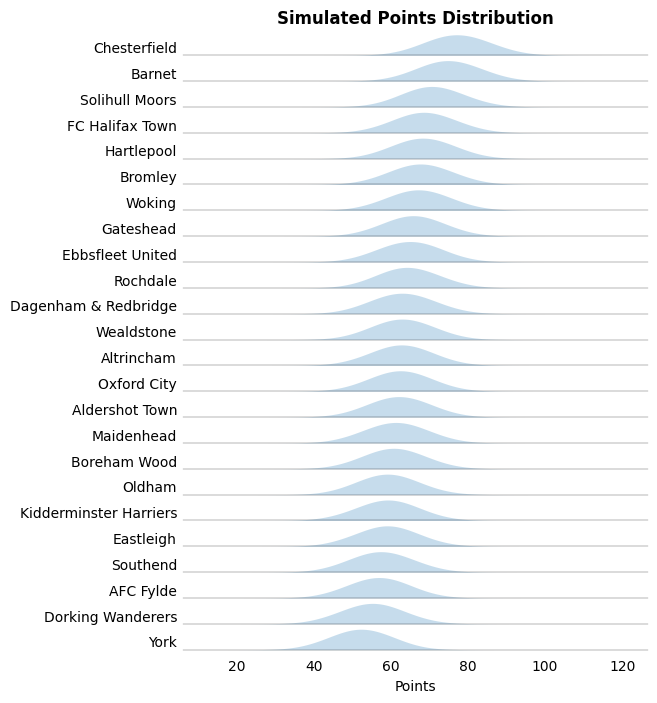

In [6]:
# Generate a plot showing the points distribution across simulations for each team, and save to specified path
plot_simulated_points_distribution(all_simulated_dfs, save_path="../images/national_league.png")